### Data Preparation
(read + add technical indicators + convert close prise to log returns)

In [29]:
import ta
import pandas as pd
import numpy as np

In [35]:
%%capture

data = pd.read_csv('data/stocks_s&p500/A_data.csv').rename(columns={"date": "Date", "open": "Open", "high": "High",
                                                                    "low": "Low", "close": "Close", "volume": "Volume"}).drop(['Name'], axis=1)
data['LogRet'] = np.log(data['Close']).diff()
data = ta.add_all_ta_features(
    data, open="Open", high="High", low="Low", close="LogRet", volume="Volume")
data_array = data[['LogRet', 'volume_adi', 'trend_macd', 'volatility_kcp', 'momentum_stoch_rsi', 'trend_sma_slow']].dropna().to_numpy()

print prices plot

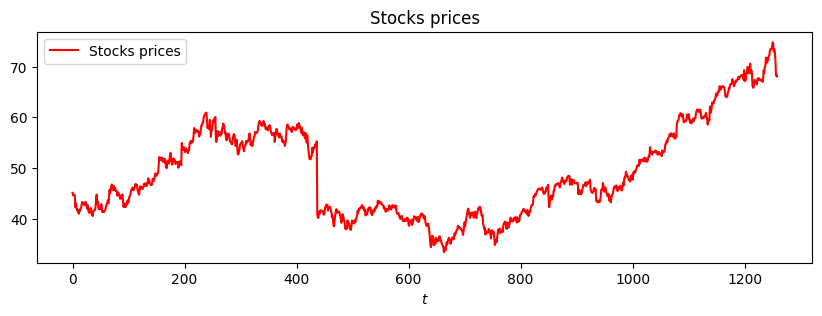

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.title("Stocks prices")
plt.xlabel("$t$")

plt.plot(data['Close'], label="Stocks prices", color="red")
plt.legend()
plt.show()

print log returns plot

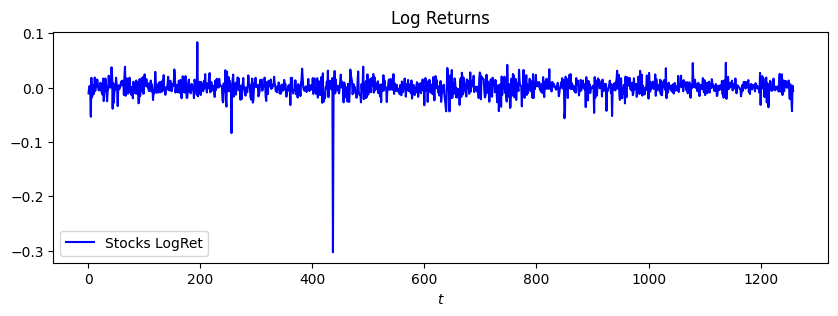

In [37]:
plt.figure(figsize=(10, 3))
plt.title("Log Returns")
plt.xlabel("$t$")

plt.plot(data['LogRet'], label="Stocks LogRet", color="blue")
plt.legend()
plt.show()

In [38]:
import statsmodels.api as sm

logrets = data['LogRet'].dropna().to_numpy()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(logrets)[1])

Dickey-Fuller test: p=0.000000


### Reservoir model

При инициализации объекта класса ESNPredictions можно выбрать: размер окна, используемого для генерации предсказаний(window_size), количество шагов предсказания(forecast_size), размер тестовой выборки(test_size) \
При вызове функции get_predictions можно указать параметр отвечающий за оптимизацию гиперпараметров модели(opt)

In [39]:
%%capture
from models.esn import ESNPredictions
from sklearn import metrics

esn_preds = ESNPredictions(data_array, window_size=50, forecast_size=1, test_size=0.1)
Y_pred = esn_preds.get_predictions(opt=True)
Y_test = esn_preds.Y_test[:, 0][:len(Y_pred)]

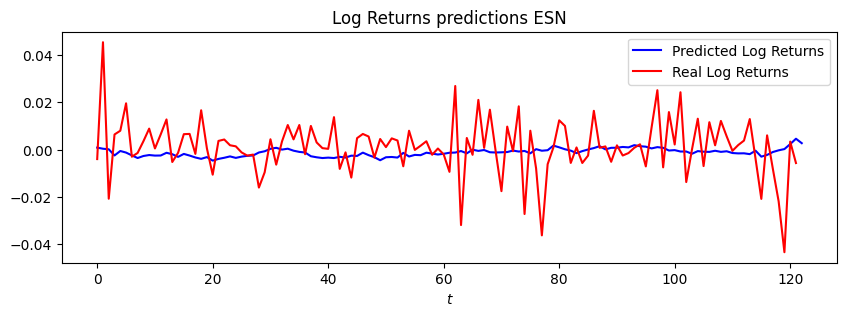

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.title("Log Returns predictions ESN")
plt.xlabel("$t$")
#plt.plot(Y_train, label="Predicted stocks", color="red")
plt.plot(Y_pred, label="Predicted Log Returns", color="blue")
plt.plot(Y_test, label="Real Log Returns", color="red")
plt.legend()
plt.show()

In [41]:
from sklearn import metrics

mae = metrics.mean_absolute_error(Y_test, Y_pred[:len(Y_test)])
print('MAE для ESN модели:', mae)

MAE для ESN модели: 0.008737323464651586


### Arima
При инициализации объекта класса Arimaredictions можно выбрать: количество шагов предсказания(forecast_size), размер тестовой выборки(test_size) \
При вызове функции get_predictions можно указать параметр отвечающий за оптимизацию гиперпараметров модели(opt)

In [42]:
%%capture
from models.arima import ArimaPredictions

arima = ArimaPredictions(data_array, forecast_size=10, test_size=0.1)
Y_pred_arima = arima.get_predictions(opt=True)
Y_test_arima = arima.Y_test[:len(Y_pred_arima)]

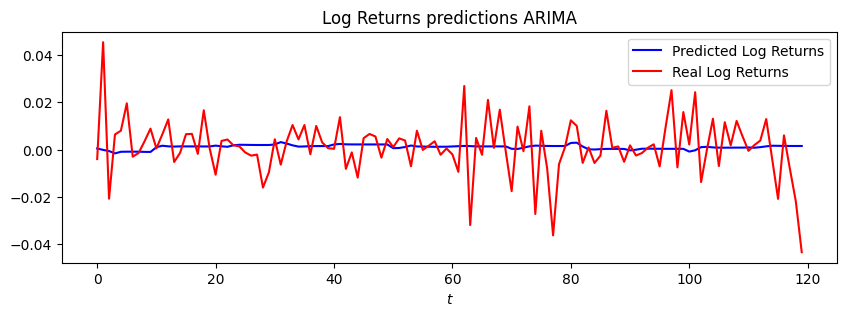

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.title("Log Returns predictions ARIMA")
plt.xlabel("$t$")
#plt.plot(Y_train, label="Predicted stocks", color="red")
plt.plot(Y_pred_arima, label="Predicted Log Returns", color="blue")
plt.plot(Y_test_arima, label="Real Log Returns", color="red")
plt.legend()
plt.show()

In [44]:
mae = metrics.mean_absolute_error(Y_test_arima, Y_pred_arima)
print('MAE для Arima модели:', mae)

MAE для Arima модели: 0.008174257800992762
